<img src="fine_tune_LLMs.jpg" width="70%">

HREF to Video

# -1 Research Background

<fieldset>
<legend>References</legend>
1. Hinton, G. E., Osindero, S., & Teh, Y. W. (2006). <a href="https://www.cs.toronto.edu/~hinton/absps/fastnc.pdf">A fast learning algorithm for deep belief nets.</a> <i>Neural computation</i>, 18(7), p. 1527-1554. <br>
2. Larochelle, H., Bengio, Y., Louradour, J., & Lamblin, P. (2009). <a href="https://www.jmlr.org/papers/volume10/larochelle09a/larochelle09a.pdf">Exploring strategies for training deep neural networks.</a> <i>Journal of machine learning research</i>, 10(1), p. 1-40.
</fieldset>

Snapshots from Larochelle et al. (2009) Exploring strategies for training deep neural networks.

<table style="border:1; border-color:red">
<th>
<td width=60% align='left'><img src="yoshio_bengio_2009_snapshot_1.jpg"></td>
<td align='left'><img src="yoshio_bengio_2009_snapshot_2.jpg" width=110%></td>
</th>    
</table>

# 0. Training Multi-Layer Perceptrons (MLPs): Pre-training and Fine-Tuning

<b>0.1 MLP Structure</b>

<img src="mlp.jpg">

<b>0.2 MLP Functionals Components</b>

<img src="mlp_functional_schema.jpg" width=60%>

<b>0.3 Restricted Boltzmann Machine (RMB)</b>

<img src="rbm.jpg">

<b>0.4 Stacked RMBs</b>

<img src="stacked_rbms.jpg" width=50%>

<b>0.5 Pre-train MLP with RMBs</b>

<img src="pre_train_MLP_with_RBMs.jpg" width=60%>

<b>0.6 Fine-Tuning Pre-Trained MLP</b>

<img src="fine_tuning_MLP.jpg" width=60%>

# 1. Transfer Learning 

<b>1.1 Transfer Learning: Basic Concept</b>

<img src="transfer_learning.jpg" width=60%>

<b>1.2 Convolutional Neural Networks: VGG16</b>

<img src="vgg16_architecture.jpg" width=60%>

<img src="vgg16_functional_schema.jpg" width=60%>

<b>1.2 Transfer Learning Quick Examples with VGG16</b>

<img src="transfer_learning_for_CNNs.jpg">

In [31]:
import tensorflow as tf

In [32]:
from tensorflow import keras

Step 1. Load trained model 

In [54]:
vgg16_model = keras.applications.vgg16.VGG16(weights='imagenet')

In [55]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [64]:
base_model = keras.applications.vgg16.VGG16(weights='imagenet',
                                            include_top=False,
                                            input_shape=eurosat_img_shape
                                           )

In [65]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [34]:
conv_base = keras.applications.vgg16.VGG16(weights='imagenet',
                                           include_top=False,
                                           input_shape=eurosat_img_shape)

transfer_layer = conv_base.get_layer('block5_pool')
conv_base.trainable = False

x = keras.layers.Flatten()(transfer_layer.output)
x = keras.layers.Dense(256)(x)
x = keras.layers.Dropout(0.5)(x)
pred = keras.layers.Dense(len(euroSAT_dataset['classes']), activation='softmax')(x)

tl_model = keras.Model(conv_base.input,pred)

In [35]:
tl_model.compile(loss="categorical_crossentropy",
                 optimizer="rmsprop",
                 metrics=["accuracy"])

In [36]:
#tl_model.build((180,180,3))
tl_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [1]:
#history = tl_model.fit(train_imgs,
#                       t
#                       batch_size=batch_size,
#                       epochs=20,
#                       steps_per_epoch=100,
#                       #verbose="auto",
#                       #callbacks=None,
#                       validation_data=validation_set,
#                       validation_steps=100
#                   )

In [1]:
#load EuroSAT dataset
import numpy as np

euroSAT_load = np.load('euroSAT_dataset.npy',allow_pickle=True)

In [2]:
euroSAT_dataset = euroSAT_load[0].copy()

In [3]:
euroSAT_dataset.keys()

dict_keys(['images', 'labels', 'classes', 'classes2label'])

In [4]:
num_samples = len(euroSAT_dataset['labels'])

In [5]:
dataset_index = np.random.permutation(num_samples)

train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

train_cut = int(num_samples*train_ratio)
valid_cut = int(num_samples*(train_ratio+valid_ratio))

train_ind = dataset_index[:train_cut]
valid_ind = dataset_index[train_cut:valid_cut]
test_ind = dataset_index[valid_cut:]

In [6]:
len(train_ind) + len(valid_ind) + len(test_ind)

27000

In [7]:
train_ind = np.squeeze(np.array(train_ind))
valid_ind = np.squeeze(np.array(valid_ind))
test_ind = np.squeeze(np.array(test_ind))

In [8]:
train_img = euroSAT_dataset['images'][train_ind]
train_img = train_img/255

valid_img = euroSAT_dataset['images'][valid_ind]
valid_img = valid_img/255

test_img = euroSAT_dataset['images'][test_ind]
test_img = test_img/255

In [9]:
eurosat_img_shape = train_img[0].shape

In [15]:
default_type = type(train_img[0])
nonetype_list = []
for i,img in enumerate(test_img):
    if type(img) != default_type:
        print(i)
        nonetype_list.append(i)

In [13]:
i

18899

In [81]:
train_labels = np.array(euroSAT_dataset['labels'])[train_ind]
train_labels = keras.utils.to_categorical(train_labels)

valid_labels = np.array(euroSAT_dataset['labels'])[valid_ind]
valid_labels = keras.utils.to_categorical(valid_labels)

test_labels = np.array(euroSAT_dataset['labels'])[test_ind]
train_img[0]. = keras.utils.to_categorical(test_labels)


In [102]:
test_labels.shape

(4050, 10)

In [78]:
train_img[0]

array([[[ 72,  93,  98],
        [ 70,  94,  98],
        [ 71,  95,  99],
        ...,
        [ 67,  92,  97],
        [ 73,  98, 102],
        [ 64,  89,  93]],

       [[ 71,  92,  97],
        [ 72,  93,  98],
        [ 71,  95,  99],
        ...,
        [ 67,  92,  96],
        [ 73,  98, 102],
        [ 64,  89,  93]],

       [[ 72,  93,  98],
        [ 72,  93,  98],
        [ 71,  94, 100],
        ...,
        [ 71,  96, 100],
        [ 74,  98, 102],
        [ 65,  89,  93]],

       ...,

       [[ 75,  96,  99],
        [ 75,  96,  99],
        [ 74,  95,  98],
        ...,
        [ 77,  95,  99],
        [ 75,  94,  98],
        [ 77,  96, 100]],

       [[ 74,  95,  98],
        [ 74,  95,  98],
        [ 75,  96,  99],
        ...,
        [ 77,  96, 100],
        [ 76,  95,  99],
        [ 78,  97, 101]],

       [[ 76,  97, 100],
        [ 76,  97, 100],
        [ 76,  97, 100],
        ...,
        [ 76,  95,  99],
        [ 75,  94,  98],
        [ 79,  98, 102]]

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [39]:
batch_size = 32

datagen_train = ImageDataGenerator(rescale=1/255)
train_set = datagen_train.flow(x=train_imgs,
                               y=train_labels,
                               batch_size=batch_size,
                               shuffle=True)


datagen_validation = ImageDataGenerator(rescale=1/255)
validation_set = datagen_validation.flow(x=valid_imgs,
                                         y=valid_labels,
                                         batch_size=batch_size,
                                         shuffle=True)

#datagen_test = ImageDataGenerator()
#test_set = datagen_train.flow(x=test_img,
#                              y=test_labels,
#                              batch_size=batch_size,
#                              shuffle=True)

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (64, 64, 3), y.shape = (100000, 200)

## 0. TRANSFORMER vs. BERT Architecture

<img src="transformers.jpg" width="70%">

In [17]:
mini_imgnet = load_dataset("zh-plus/tiny-imagenet")

README.md:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

C:\Users\18623\anaconda3\envs\transformers\lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\18623\.cache\huggingface\hub\datasets--zh-plus--tiny-imagenet. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


dataset_infos.json:   0%|          | 0.00/3.52k [00:00<?, ?B/s]

(…)-00000-of-00001-1359597a978bc4fa.parquet:   0%|          | 0.00/146M [00:00<?, ?B/s]

(…)-00000-of-00001-70d52db3c749a935.parquet:   0%|          | 0.00/14.6M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/100000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [26]:
type(mini_imgnet['valid']['label'][0])

int

In [27]:
type(mini_imgnet['valid']['image'])

list

In [44]:
valid_array = np.array([])
valid_imgs = mini_imgnet['valid']['image'].copy()
for i, img in enumerate(valid_imgs):
    new_image = img.resize((200, 200))
    valid_array = np.stack([valid_array,np.array(new_image)])

ValueError: all input arrays must have the same shape

In [41]:
valid_array = np.array(valid_imgs)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (10000, 64, 64) + inhomogeneous part.

In [29]:
train_imgs = mini_imgnet['train']['image'].copy()
for i, img in enumerate(train_imgs):
    train_imgs[i] = np.array(img)

In [33]:
train_labels = keras.utils.to_categorical(mini_imgnet['train']['label'],
                                         num_classes=200)
valid_labels = keras.utils.to_categorical(mini_imgnet['valid']['label'],
                                         num_classes=200)

### Fine-tune BERT Base model for Support Ticket Dataset Classification

In [16]:
from datasets import load_dataset
from datasets import DatasetDict, Dataset

import matplotlib.pyplot as plt

from transformers import (logging,
    AutoTokenizer, DataCollatorWithPadding, 
    AutoModelForSequenceClassification, TrainingArguments, Trainer
    )
import evaluate
import numpy as np
import pandas as pd

# ignore warnings from transformers lib
logging.set_verbosity_error() 

### 1. Load data from Support Tickets Dataset

<b>1.1 Load Support Tickets Dataset fom HuggingFace Hub</b>

In [2]:
support_tickets = load_dataset("phi-ai-info/support_tickets",name='alpha')

In [3]:
support_tickets

DatasetDict({
    train: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class'],
        num_rows: 1075
    })
})

In [4]:
def dataset_to_df(dataset_obj, 
                  label=None,
                  reference='class',
                  new_key='label'
                 ):
    cols = list(dataset_obj[0].keys())

    cols_values = {item:[] for item in cols}
    for json_rec in dataset_obj:
        for item in cols:
            cols_values[item].append(json_rec[item])
    
    if label is not None:
        cols += [new_key]
        cols_values[new_key] = []
        for json_rec in dataset_obj:
            cols_values[new_key].append(label[json_rec[reference]])
    
    return pd.DataFrame({item:cols_values[item] for item in cols})

In [5]:
label_class_dict = {'revoke access': 'access',
 'grant access': 'access',
 'access profile': 'access',
 'add user': 'user',
 'delete user': 'user',
 'create user': 'user',
 'modify user': 'user',
 'user role': 'user',
 'disk space': 'storage',
 'hard disk': 'storage',
 'disk full': 'storage',
 'ssd disk': 'storage',
 'disk error': 'storage',
 'shared disk': 'storage',
 'nas disk': 'storage',
 'printer functioning': 'printer',
 'printer driver': 'printer',
 'printer toner': 'printer',
 'printer paper': 'printer',
 'wifi functioning': 'network',
 'network functioning': 'network',
 'email server': 'servers',
 'web server': 'servers'}

In [6]:
label_name_dict = {item: i for i,item in enumerate(list(set(label_class_dict.values())))}
label_name_dict

{'user': 0,
 'servers': 1,
 'printer': 2,
 'access': 3,
 'network': 4,
 'storage': 5}

In [7]:
label_dict = {'grant access': 0,
 'revoke access': 0,
 'access profile': 0,
 'disk space': 1,
 'disk full': 1,
 'disk error': 1,
 'add user': 2,
 'delete user': 2,
 'create user': 2,
 'modify user': 2}

In [8]:
df_set = dataset_to_df(support_tickets['train'], 
                       label=label_name_dict)

In [9]:
df_set.head()


,subject,description,key_phrase,class,label
0,Revoke User Access,A user who has left the company still has acce...,revoke access,access,3
1,Revoke Access to Shared Drive,An employee no longer requires access to the s...,revoke access,access,3
2,Revoke VPN Access,Please remove VPN access for an ex-contractor ...,revoke access,access,3
3,Urgent: Revoke Unauthorized Access,We suspect unauthorized access to the database...,revoke access,access,3
4,Remove Admin Privileges,Revoke access to admin tools for a user who no...,revoke access,access,3


df_set

In [10]:
random_index = np.random.permutation(df_set.index)
random_index

array([838,  10, 251, ..., 482, 481, 732], dtype=int64)

In [11]:
subsets = ['train','valid','test']
train_ratio = 0.6
lng = len(random_index)
train_start = 0
train_end = int(lng*train_ratio)

val_ratio = 0.2
val_start = train_end+1
val_end = int(lng*(train_ratio+val_ratio))

test_start = val_end + 1 
test_end = lng

split_ind = np.array([[train_start,train_end],
                      [val_start,val_end],
                      [test_start,test_end]])

ind2subset = {key:random_index[split_ind[i][0]:split_ind[i][1]] for i,key in enumerate(subsets)}
ind2subset

{'train': array([ 838,   10,  251,  822,  761,  725,   91,  302,  864,  294,  610,
         182,  199,  705,  295,  449,  662,  459,  570,  629,  441,  829,
         666,  446,  906,  160,  698,  515,   69,  771,  508,  313,  447,
         228, 1064,  765,  930,  322,  124,  258,  438,  910,  298,  759,
         271,  434,  975,  270,  918, 1065,  895,   71,  126,  326,  686,
         492,  991,  622,  788,  559,  845,  480,  100,  729,  685,   81,
         479, 1037,  475,  665,  103,  219,  566,  292,  746,   63,  468,
         532,  955,   66,  933,  952,  325,   57,  552,  187,   90,  567,
         839,  661, 1055,   55,  977,  491,  361,  358,  831,  641,  737,
          17,  535,   34,  578,  319,  694,  919,  369,  588,  467,  937,
         699,  626,  950,  653,  814,  153,   72,  727,  162,  844,  345,
         548,  427,   51,  893,  720,  638,  672,  787,  204,  300,  266,
         987,   45,  556, 1070,  669, 1010,  495,    2,  828,  792,  395,
        1039,   54,  942,  16

In [31]:
df_set.iloc[ind2subset['valid']]['label'].unique()

array([5, 0, 4, 2, 3, 1], dtype=int64)

<b>1.3 Create a Dataset with Train, Validation and Test splits</b>

In [13]:
ds_splits = DatasetDict({
                        'train': Dataset.from_pandas(
                                                    df_set.iloc[ind2subset['train']]
                                                    ),
                        'valid': Dataset.from_pandas(
                                                    df_set.iloc[ind2subset['valid']]
                                                    ),
                        'test': Dataset.from_pandas(
                                                    df_set.iloc[ind2subset['test']]
                                                    )
                        })
ds_splits

DatasetDict({
    train: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__'],
        num_rows: 645
    })
    valid: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__'],
        num_rows: 214
    })
    test: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__'],
        num_rows: 214
    })
})

In [14]:
subsets = ['train','valid','test']
split_dict = { key: Dataset.from_pandas(df_set.iloc[ind2subset[key]]) for key in subsets}
support_tickets_splits = DatasetDict(split_dict)
support_tickets_splits

DatasetDict({
    train: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__'],
        num_rows: 645
    })
    valid: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__'],
        num_rows: 214
    })
    test: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__'],
        num_rows: 214
    })
})

### 2. Train BERT base Model

<b>2.1 Load model from HuggingFace Hub</b>

In [32]:
label_name_dict

{'user': 0,
 'servers': 1,
 'printer': 2,
 'access': 3,
 'network': 4,
 'storage': 5}

In [66]:
model_path = "google-bert/bert-base-uncased"
#model_path = 'distilbert-base-uncased'

tokenizer = AutoTokenizer.from_pretrained(model_path)

label2id = label_name_dict.copy()
id2label = {label2id[key]:key for key in label2id}
#id2label = {0: "access", 1: "disk", 2: "user"}
#label2id = {id2label[key]:key for key in id2label}

model = AutoModelForSequenceClassification.from_pretrained(model_path, 
                                                           num_labels=len(list(id2label.keys())), 
                                                           id2label=id2label, 
                                                           label2id=label2id
                                                          )

In [34]:
label2id

{'user': 0,
 'servers': 1,
 'printer': 2,
 'access': 3,
 'network': 4,
 'storage': 5}

In [35]:
id2label

{0: 'user',
 1: 'servers',
 2: 'printer',
 3: 'access',
 4: 'network',
 5: 'storage'}

<b>2.2 Viz Model Stru</b>

In [36]:
# print layers
for name, param in model.named_parameters():
   print(name, param.requires_grad)

bert.embeddings.word_embeddings.weight True
bert.embeddings.position_embeddings.weight True
bert.embeddings.token_type_embeddings.weight True
bert.embeddings.LayerNorm.weight True
bert.embeddings.LayerNorm.bias True
bert.encoder.layer.0.attention.self.query.weight True
bert.encoder.layer.0.attention.self.query.bias True
bert.encoder.layer.0.attention.self.key.weight True
bert.encoder.layer.0.attention.self.key.bias True
bert.encoder.layer.0.attention.self.value.weight True
bert.encoder.layer.0.attention.self.value.bias True
bert.encoder.layer.0.attention.output.dense.weight True
bert.encoder.layer.0.attention.output.dense.bias True
bert.encoder.layer.0.attention.output.LayerNorm.weight True
bert.encoder.layer.0.attention.output.LayerNorm.bias True
bert.encoder.layer.0.intermediate.dense.weight True
bert.encoder.layer.0.intermediate.dense.bias True
bert.encoder.layer.0.output.dense.weight True
bert.encoder.layer.0.output.dense.bias True
bert.encoder.layer.0.output.LayerNorm.weight True


<b>2.3 Freeze base model</b>

In [37]:
# freeze base model parameters and unfreeze base model pooling layers
for name, param in model.base_model.named_parameters():
    if "pooler" in name:
        param.requires_grad = True
    else:
        param.requires_grad = False

In [38]:
# print layers
for name, param in model.named_parameters():
   print(name, param.requires_grad)

bert.embeddings.word_embeddings.weight False
bert.embeddings.position_embeddings.weight False
bert.embeddings.token_type_embeddings.weight False
bert.embeddings.LayerNorm.weight False
bert.embeddings.LayerNorm.bias False
bert.encoder.layer.0.attention.self.query.weight False
bert.encoder.layer.0.attention.self.query.bias False
bert.encoder.layer.0.attention.self.key.weight False
bert.encoder.layer.0.attention.self.key.bias False
bert.encoder.layer.0.attention.self.value.weight False
bert.encoder.layer.0.attention.self.value.bias False
bert.encoder.layer.0.attention.output.dense.weight False
bert.encoder.layer.0.attention.output.dense.bias False
bert.encoder.layer.0.attention.output.LayerNorm.weight False
bert.encoder.layer.0.attention.output.LayerNorm.bias False
bert.encoder.layer.0.intermediate.dense.weight False
bert.encoder.layer.0.intermediate.dense.bias False
bert.encoder.layer.0.output.dense.weight False
bert.encoder.layer.0.output.dense.bias False
bert.encoder.layer.0.output.Lay

#### 3. Training Helpers

<b>3.1 Preprocess Text Data</b>

In [39]:
# define text preprocessing
def preprocess_function(examples):
    return tokenizer(examples["description"], truncation='only_first')

In [40]:
# tokenize all datasetse
tokenized_data = support_tickets_splits.map(preprocess_function, batched=True)

Map:   0%|          | 0/645 [00:00<?, ? examples/s]

Map:   0%|          | 0/214 [00:00<?, ? examples/s]

Map:   0%|          | 0/214 [00:00<?, ? examples/s]

In [41]:
# create data collator
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

<b>3.2 Evaluation metrics</b>

In [42]:
# load metrics
accuracy = evaluate.load("accuracy")
#auc_score = evaluate.load("roc_auc")

def compute_softmax(preds):
    max_val = preds.max()
    pred_exp = np.exp(preds-max_val)
    probs = pred_exp/pred_exp.sum(-1, keepdims=True)
    return probs 


def compute_metrics(eval_pred):
    # get predictions
    predictions, labels = eval_pred
    
    # apply softmax to get probabilities
    probabilities = compute_softmax(predictions)
    # use probabilities of the positive class for ROC AUC
    positive_class_probs = probabilities[:, 1]
    # compute auc
    #auc = float(round(auc_score.compute(prediction_scores=positive_class_probs, references=labels)['roc_auc'],3))
    
    # predict most probable class
    predicted_classes = np.argmax(predictions, axis=1)
    # compute accuracy
    acc = float(round(accuracy.compute(predictions=predicted_classes, references=labels)['accuracy'],3))
    
    return {"Accuracy": acc}#, "AUC": auc}

#### 4. Train model

<b>4.1 Set Training Arguments</b>

In [44]:
# hyperparameters
lr = 1e-2
batch_size = 8
num_epochs = 100

training_args = TrainingArguments(
    output_dir="bert_ticket_classifier",
    learning_rate=lr,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_epochs,
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    use_cpu=False
)

In [45]:
training_args

TrainingArguments(
_n_gpu=1,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=True,
dispatch_batches=None,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=epoch,
eval_use_gather_object=

In [46]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

<b>4.2 Define Trainer Module</b>

In [47]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_data["train"],
    eval_dataset=tokenized_data["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

C:\Users\18623\AppData\Local\Temp\ipykernel_22168\1785676439.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [48]:
import torch

In [49]:
#trainer.__dict__['args'].device = torch.device('cpu')
trainer.args.device

device(type='cuda', index=0)

<b>4.3 Fine-tune BERT Model</b>

In [50]:
trainer.train()

C:\Users\18623\anaconda3\envs\transformers\lib\site-packages\transformers\models\bert\modeling_bert.py:440: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


{'loss': 2.0212, 'grad_norm': 14.358091354370117, 'learning_rate': 0.0099, 'epoch': 1.0}
{'eval_loss': 1.600338339805603, 'eval_Accuracy': 0.593, 'eval_runtime': 0.5976, 'eval_samples_per_second': 358.12, 'eval_steps_per_second': 45.183, 'epoch': 1.0}
{'loss': 1.2775, 'grad_norm': 6.5310869216918945, 'learning_rate': 0.0098, 'epoch': 2.0}
{'eval_loss': 1.178826928138733, 'eval_Accuracy': 0.668, 'eval_runtime': 0.5394, 'eval_samples_per_second': 396.74, 'eval_steps_per_second': 50.056, 'epoch': 2.0}
{'loss': 1.7034, 'grad_norm': 9.957550048828125, 'learning_rate': 0.0097, 'epoch': 3.0}
{'eval_loss': 1.4956490993499756, 'eval_Accuracy': 0.621, 'eval_runtime': 0.5692, 'eval_samples_per_second': 375.944, 'eval_steps_per_second': 47.432, 'epoch': 3.0}
{'loss': 1.2921, 'grad_norm': 6.431549072265625, 'learning_rate': 0.0096, 'epoch': 4.0}
{'eval_loss': 1.5104053020477295, 'eval_Accuracy': 0.724, 'eval_runtime': 0.5246, 'eval_samples_per_second': 407.941, 'eval_steps_per_second': 51.469, 'epo

TrainOutput(global_step=8100, training_loss=0.6945069548524456, metrics={'train_runtime': 346.6432, 'train_samples_per_second': 186.07, 'train_steps_per_second': 23.367, 'train_loss': 0.6945069548524456, 'epoch': 100.0})

<b>4.4 Extract Training History</b>

In [51]:
trainer.state.log_history[18]

{'loss': 1.2974,
 'grad_norm': 12.113360404968262,
 'learning_rate': 0.009000000000000001,
 'epoch': 10.0,
 'step': 810}

In [52]:
trainer.state.log_history[19]

{'eval_loss': 1.0253123044967651,
 'eval_Accuracy': 0.808,
 'eval_runtime': 0.4912,
 'eval_samples_per_second': 435.699,
 'eval_steps_per_second': 54.971,
 'epoch': 10.0,
 'step': 810}

In [53]:
trainer.state.log_history[20]

{'loss': 1.2389,
 'grad_norm': 23.04060935974121,
 'learning_rate': 0.0089,
 'epoch': 11.0,
 'step': 891}

In [54]:
len(trainer.state.log_history[:-1]),len(trainer.state.log_history)

(200, 201)

In [55]:
learning_history = trainer.state.log_history[:-1]

In [56]:
hist_dict = {
'train_loss': [],
'valid_loss': [],
'valid_acc': []
}

for item in learning_history:
    if 'loss' in item:
        hist_dict['train_loss'].append(item['loss'])
        continue
        
    if 'eval_loss' in item:
        hist_dict['valid_loss'].append(item['eval_loss'])
        hist_dict['valid_acc'].append(item['eval_Accuracy'])

In [57]:
for key in  hist_dict:
    print(key,hist_dict[key])

train_loss [2.0212, 1.2775, 1.7034, 1.2921, 1.257, 1.3413, 0.7906, 1.2516, 1.3148, 1.2974, 1.2389, 1.1045, 1.3437, 0.8278, 0.9239, 1.0084, 0.877, 1.0983, 1.2775, 0.9663, 1.1278, 0.8827, 1.0061, 1.2043, 0.9315, 0.8766, 0.7483, 1.2985, 0.9424, 1.1101, 0.9561, 1.0855, 0.8964, 1.0509, 0.7739, 0.7851, 0.8152, 0.8836, 0.7723, 0.7501, 0.483, 1.0584, 0.6389, 0.7146, 0.6928, 0.4639, 0.6033, 0.6962, 0.9246, 0.6567, 0.5567, 0.7044, 0.5335, 0.626, 0.5281, 0.5379, 0.6508, 0.554, 0.5865, 0.3566, 0.4272, 0.482, 0.5246, 0.5808, 0.3696, 0.5993, 0.4631, 0.3637, 0.3746, 0.4117, 0.3401, 0.5826, 0.6382, 0.3372, 0.3392, 0.455, 0.2926, 0.3121, 0.4019, 0.3274, 0.3323, 0.3841, 0.3506, 0.257, 0.2488, 0.267, 0.331, 0.2808, 0.2847, 0.186, 0.253, 0.2368, 0.2744, 0.1824, 0.2044, 0.2148, 0.2387, 0.2226, 0.1734, 0.2277]
valid_loss [1.600338339805603, 1.178826928138733, 1.4956490993499756, 1.5104053020477295, 1.889670491218567, 0.5227786898612976, 0.6607946753501892, 1.9461236000061035, 0.5054450631141663, 1.025312304

Text(0.5, 0, 'Epochs')

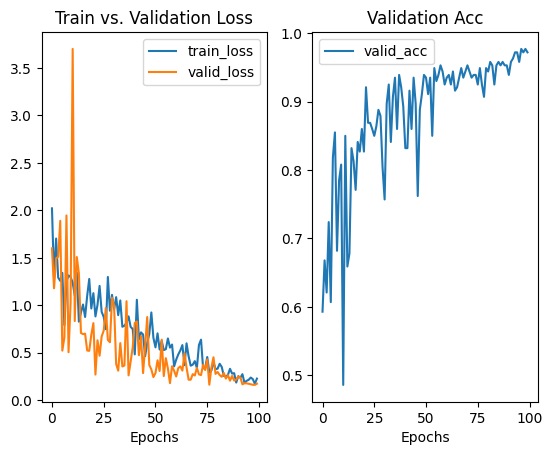

In [58]:
plt.subplot(1,2,1)
for key in  list(hist_dict.keys())[:-1]:
    plt.plot(hist_dict[key])
plt.legend(list(hist_dict.keys())[:-1])
plt.title('Train vs. Validation Loss')
plt.xlabel('Epochs')

plt.subplot(1,2,2)
for key in  [list(hist_dict.keys())[-1]]:
    plt.plot(hist_dict[key])
plt.legend([list(hist_dict.keys())[-1]])
plt.title('Validation Acc')
plt.xlabel('Epochs')

<b> 4.5 Apply Model to Validation Dataset</b>

In [106]:
# apply model to validation dataset
split_key = 'test'

predictions = trainer.predict(tokenized_data[split_key])

# Extract the logits and labels from the predictions object
logits = predictions.predictions
labels = predictions.label_ids

# Use your compute_metrics function
#metrics = compute_metrics((logits, labels))
#print(metrics)
true_count = 0
for pred_l,actu_l in zip(labels,support_tickets_splits[split_key]['label']): 
    if pred_l == actu_l:
        true_count += 1
print(f'Accuracy {true_count/len(labels)}')

Accuracy 1.0


In [107]:
labels

array([2, 5, 5, 2, 5, 0, 5, 5, 5, 5, 4, 4, 0, 1, 2, 5, 0, 4, 0, 1, 3, 4,
       5, 0, 3, 2, 2, 1, 5, 0, 0, 0, 2, 0, 0, 2, 5, 1, 2, 5, 5, 2, 5, 5,
       0, 1, 5, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 4, 2, 0, 2, 4, 5, 5, 3,
       4, 5, 2, 1, 5, 2, 0, 5, 2, 1, 5, 5, 5, 5, 2, 5, 5, 5, 0, 3, 5, 1,
       3, 0, 2, 0, 5, 0, 3, 5, 0, 0, 0, 5, 4, 4, 3, 2, 1, 5, 5, 0, 0, 3,
       5, 4, 0, 0, 3, 5, 4, 0, 5, 5, 0, 1, 3, 4, 5, 0, 5, 0, 5, 2, 5, 1,
       3, 0, 4, 0, 5, 4, 4, 2, 5, 2, 5, 3, 5, 1, 5, 1, 0, 5, 0, 0, 2, 5,
       2, 1, 3, 5, 2, 1, 0, 2, 2, 3, 5, 5, 2, 2, 0, 0, 4, 3, 3, 0, 2, 2,
       1, 2, 5, 5, 3, 0, 0, 0, 1, 1, 5, 0, 5, 5, 4, 2, 2, 5, 5, 5, 2, 0,
       0, 5, 0, 3, 4, 5, 1, 1, 5, 1, 0, 5, 5, 5, 5, 2], dtype=int64)

In [108]:
support_tickets_splits['test']['label']

[2,
 5,
 5,
 2,
 5,
 0,
 5,
 5,
 5,
 5,
 4,
 4,
 0,
 1,
 2,
 5,
 0,
 4,
 0,
 1,
 3,
 4,
 5,
 0,
 3,
 2,
 2,
 1,
 5,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 5,
 1,
 2,
 5,
 5,
 2,
 5,
 5,
 0,
 1,
 5,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 4,
 2,
 0,
 2,
 4,
 5,
 5,
 3,
 4,
 5,
 2,
 1,
 5,
 2,
 0,
 5,
 2,
 1,
 5,
 5,
 5,
 5,
 2,
 5,
 5,
 5,
 0,
 3,
 5,
 1,
 3,
 0,
 2,
 0,
 5,
 0,
 3,
 5,
 0,
 0,
 0,
 5,
 4,
 4,
 3,
 2,
 1,
 5,
 5,
 0,
 0,
 3,
 5,
 4,
 0,
 0,
 3,
 5,
 4,
 0,
 5,
 5,
 0,
 1,
 3,
 4,
 5,
 0,
 5,
 0,
 5,
 2,
 5,
 1,
 3,
 0,
 4,
 0,
 5,
 4,
 4,
 2,
 5,
 2,
 5,
 3,
 5,
 1,
 5,
 1,
 0,
 5,
 0,
 0,
 2,
 5,
 2,
 1,
 3,
 5,
 2,
 1,
 0,
 2,
 2,
 3,
 5,
 5,
 2,
 2,
 0,
 0,
 4,
 3,
 3,
 0,
 2,
 2,
 1,
 2,
 5,
 5,
 3,
 0,
 0,
 0,
 1,
 1,
 5,
 0,
 5,
 5,
 4,
 2,
 2,
 5,
 5,
 5,
 2,
 0,
 0,
 5,
 0,
 3,
 4,
 5,
 1,
 1,
 5,
 1,
 0,
 5,
 5,
 5,
 5,
 2]

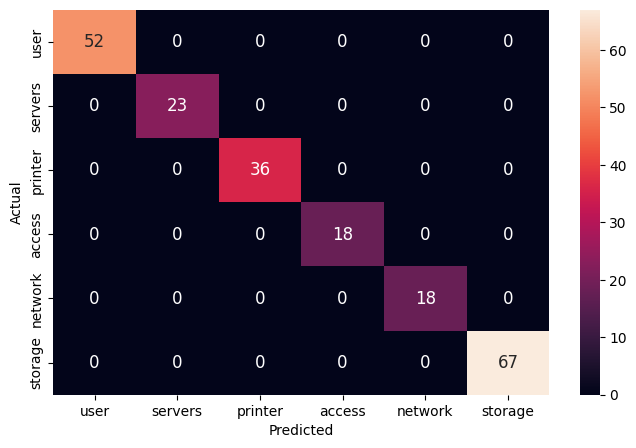

In [109]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

font_size = 12
label_class = list(label2id.keys())
cl_rep = classification_report(support_tickets_splits['test']['label'],
                               labels,
                               target_names=label_class,
                               output_dict=True
                            )

cm = confusion_matrix(support_tickets_splits['test']['label'],
                      labels)

plt.figure(figsize = (8, 5))
sns.heatmap(cm,
            xticklabels=label_class,
            yticklabels=label_class,
            annot = True,  fmt = '.0f',
            annot_kws={'size': font_size})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [110]:
df = pd.DataFrame(cl_rep)
df

,user,servers,printer,access,network,storage,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
support,52.0,23.0,36.0,18.0,18.0,67.0,1.0,214.0,214.0


In [ ]:
# # push model to hub
# trainer.push_to_hub()

## LORA

In [111]:
#model_path = "google-bert/bert-base-uncased"
model_path_dict = {}
model_path_dict['lora'] = 'distilbert-base-uncased'

label2id = label_name_dict.copy()
id2label = {label2id[key]:key for key in label2id}
#id2label = {0: "access", 1: "disk", 2: "user"}
#label2id = {id2label[key]:key for key in id2label}

model_dict = {}

model_dict['lora'] = AutoModelForSequenceClassification.from_pretrained(model_path_dict['lora'], 
                                                                        num_labels=len(list(id2label.keys())), 
                                                                        id2label=id2label, 
                                                                        label2id=label2id
                                                                       )

In [112]:
# create tokenizer
tokenizer_dict = {}
tokenizer_dict['lora'] = AutoTokenizer.from_pretrained(model_path_dict['lora'], 
                                                       add_prefix_space=True)

# add pad token if none exists
if tokenizer_dict['lora'].pad_token is None:
    tokenizer_dict['lora'].add_special_tokens({'pad_token': '[PAD]'})
    model.resize_token_embeddings(len(tokenizer_dict['lora']))

In [113]:
tokenizer_dict['lora']

DistilBertTokenizerFast(name_or_path='distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [116]:
# create tokenize function
def tokenize_function_lora(examples):
    # extract text
    text = examples["description"]

    #tokenize and truncate text
    tokenizer_dict['lora'].truncation_side = "left"
    tokenized_inputs = tokenizer_dict['lora'](text,
                                              return_tensors="np",
                                              truncation=True,
                                              max_length=512
                                             )

    return tokenized_inputs

In [117]:
# tokenize training and validation datasets

tokenized_dataset_dict = {}
tokenized_dataset_dict['lora'] = ds_splits.map(tokenize_function_lora, 
                                               batched=True)
tokenized_dataset_dict['lora']

Map:   0%|          | 0/645 [00:00<?, ? examples/s]

Map:   0%|          | 0/214 [00:00<?, ? examples/s]

Map:   0%|          | 0/214 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 645
    })
    valid: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 214
    })
    test: Dataset({
        features: ['subject', 'description', 'key_phrase', 'class', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 214
    })
})

In [118]:
# create data collator
data_collator_dict = {}

data_collator_dict['lora'] = DataCollatorWithPadding(tokenizer=tokenizer_dict['lora'])

In [85]:
# import accuracy evaluation metric
accuracy = evaluate.load("accuracy")

# define an evaluation function to pass into trainer later
def compute_metrics(p):
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    return {"accuracy": accuracy.compute(predictions=predictions, references=labels)}

In [75]:
from peft import PeftModel, PeftConfig, get_peft_model, LoraConfig
import evaluate

In [76]:
for name, param in model_lora.named_parameters():
   print(name, param.requires_grad)

distilbert.embeddings.word_embeddings.weight True
distilbert.embeddings.position_embeddings.weight True
distilbert.embeddings.LayerNorm.weight True
distilbert.embeddings.LayerNorm.bias True
distilbert.transformer.layer.0.attention.q_lin.weight True
distilbert.transformer.layer.0.attention.q_lin.bias True
distilbert.transformer.layer.0.attention.k_lin.weight True
distilbert.transformer.layer.0.attention.k_lin.bias True
distilbert.transformer.layer.0.attention.v_lin.weight True
distilbert.transformer.layer.0.attention.v_lin.bias True
distilbert.transformer.layer.0.attention.out_lin.weight True
distilbert.transformer.layer.0.attention.out_lin.bias True
distilbert.transformer.layer.0.sa_layer_norm.weight True
distilbert.transformer.layer.0.sa_layer_norm.bias True
distilbert.transformer.layer.0.ffn.lin1.weight True
distilbert.transformer.layer.0.ffn.lin1.bias True
distilbert.transformer.layer.0.ffn.lin2.weight True
distilbert.transformer.layer.0.ffn.lin2.bias True
distilbert.transformer.lay

In [79]:
peft_config = LoraConfig(task_type="SEQ_CLS",
                        r=4,
                        lora_alpha=32,
                        lora_dropout=0.01,
                        target_modules = ['q_lin','k_lin','v_lin'])

In [119]:
model_dict['lora'] = get_peft_model(model_dict['lora'], 
                                    peft_config)
model_dict['lora'].print_trainable_parameters()

trainable params: 705,798 || all params: 67,663,884 || trainable%: 1.0431


In [120]:
# hyperparameters
lr = 1e-3
batch_size = 16
num_epochs = 10

In [121]:
train_arg_dict = {}
# define training arguments
train_arg_dict['lora'] = TrainingArguments(
                                            output_dir= model_path_dict['lora'] + "-lora-text-classification",
                                            learning_rate=lr,
                                            per_device_train_batch_size=batch_size,
                                            per_device_eval_batch_size=batch_size,
                                            num_train_epochs=num_epochs,
                                            weight_decay=0.01,
                                            eval_strategy="epoch",
                                            save_strategy="epoch",
                                            load_best_model_at_end=True,
                                        )

In [131]:
trainer_dict = {}
trainer_dict['lora'] = Trainer(model=model_dict['lora'],
                               args=train_arg_dict['lora'],
                               train_dataset=tokenized_dataset_dict['lora']["train"],
                               eval_dataset=tokenized_dataset_dict['lora']["valid"],
                               tokenizer=tokenizer_dict['lora'],
                               data_collator=data_collator_dict['lora'],
                               compute_metrics=compute_metrics)

C:\Users\18623\AppData\Local\Temp\ipykernel_22168\2244444475.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer_dict['lora'] = Trainer(model=model_dict['lora'],


In [132]:
trainer_dict['lora'].train()

{'eval_loss': 0.26290515065193176, 'eval_accuracy': {'accuracy': 0.9626168224299065}, 'eval_runtime': 0.2207, 'eval_samples_per_second': 969.592, 'eval_steps_per_second': 63.431, 'epoch': 1.0}
{'eval_loss': 0.05531955137848854, 'eval_accuracy': {'accuracy': 0.985981308411215}, 'eval_runtime': 0.2007, 'eval_samples_per_second': 1066.356, 'eval_steps_per_second': 69.762, 'epoch': 2.0}
{'eval_loss': 0.02245279774069786, 'eval_accuracy': {'accuracy': 0.9906542056074766}, 'eval_runtime': 0.2329, 'eval_samples_per_second': 918.857, 'eval_steps_per_second': 60.112, 'epoch': 3.0}
{'eval_loss': 0.02124192751944065, 'eval_accuracy': {'accuracy': 0.9906542056074766}, 'eval_runtime': 0.2414, 'eval_samples_per_second': 886.543, 'eval_steps_per_second': 57.998, 'epoch': 4.0}
{'eval_loss': 0.05824288725852966, 'eval_accuracy': {'accuracy': 0.9906542056074766}, 'eval_runtime': 0.2233, 'eval_samples_per_second': 958.412, 'eval_steps_per_second': 62.7, 'epoch': 5.0}
{'eval_loss': 0.05232155695557594, 'e

TrainOutput(global_step=410, training_loss=0.01899763432944693, metrics={'train_runtime': 20.7797, 'train_samples_per_second': 310.399, 'train_steps_per_second': 19.731, 'train_loss': 0.01899763432944693, 'epoch': 10.0})

In [133]:
split_key = "test"

# apply model to validation dataset
predictions = trainer.predict(tokenized_data[split_key])

# Extract the logits and labels from the predictions object
logits = predictions.predictions
labels = predictions.label_ids

# Use your compute_metrics function
#metrics = compute_metrics((logits, labels))
#print(metrics)
true_count = 0
for pred_l,actu_l in zip(labels,support_tickets_splits[split_key]['label']): 
    if pred_l == actu_l:
        true_count += 1
print(f'Accuracy {true_count/len(labels)}')

Accuracy 1.0


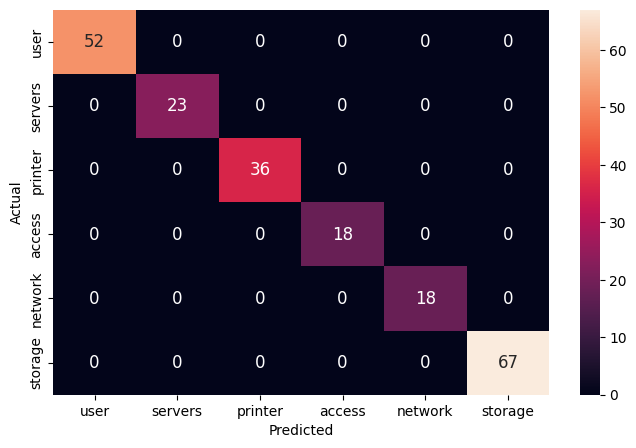

In [135]:
font_size = 12
label_class = list(label2id.keys())
cl_rep = classification_report(support_tickets_splits['test']['label'],
                               labels,
                               target_names=label_class,
                               output_dict=True
                            )

cm = confusion_matrix(support_tickets_splits['test']['label'],
                      labels)

plt.figure(figsize = (8, 5))
sns.heatmap(cm,
            xticklabels=label_class,
            yticklabels=label_class,
            annot = True,  fmt = '.0f',
            annot_kws={'size': font_size})
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()